In [1196]:
#Using NLP in it (Natural language processing)

In [1197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 #(to read sqlite data)

In [1198]:
con = sqlite3.connect("password_data.sqlite")

In [1199]:
data= pd.read_sql_query("SELECT * FROM USERS" ,  con)  #users is a table in password_data which can be checked from sqlite website

In [1200]:
data.shape

(100000, 3)

In [1201]:
data

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1
...,...,...,...
99995,99995,obejofi215,1
99996,99996,fmiopvxb64,1
99997,99997,czvrbun38,1
99998,99998,mymyxe430,1


In [1202]:
#Strength 0= weak, 1 = medium , 2= strong

In [1203]:
#Data cleaning-- to find missing, irrelevent and repeating columns

In [1204]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [1205]:
#Index is useless as we already have index
data.drop(["index"], axis=1, inplace= True)

In [1206]:
data.head(2)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1


In [1207]:
data.duplicated() #To check duplicate values

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [1208]:
data.duplicated().sum()

0

In [1209]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [1210]:
data.isnull().any().sum()

0

In [1211]:
data.dtypes

password    object
strength     int64
dtype: object

In [1212]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [1213]:
#NO irrelevent value i.e except 0,1,2

In [1214]:
#Performing Semantic analysis
"""
Semantic analysis=
How many password textual holds only == 
                                        i) Numeric
                                        ii) Upper case
                                        iii)Aplha numeric
                                        iv) title-case char
                                        v) some special char
                                        """

'\nSemantic analysis=\nHow many password textual holds only == \n                                        i) Numeric\n                                        ii) Upper case\n                                        iii)Aplha numeric\n                                        iv) title-case char\n                                        v) some special char\n                                        '

In [1215]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [1216]:
type(data["password"])

pandas.core.series.Series

In [1217]:
type(data["password"][0])

str

In [1218]:
#So we have values in the form of string

In [1219]:
data["password"].str.isnumeric()   

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [1220]:
data["password"].str.isnumeric().sum()

26

In [1221]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [1222]:
#26 password contain only numeric

In [1223]:
data[data["password"].str.isupper()].shape   

(1506, 2)

In [1224]:
# 1506 password contain only uppercase

In [1225]:
data[data["password"].str.isalpha()].shape   

(50, 2)

In [1226]:
#50 password contain only alphabets

In [1227]:
data[data["password"].str.isalnum()].shape

(97203, 2)

In [1228]:
#97203 password contain only alphanumeric

In [1229]:
data[data["password"].str.istitle()].shape

(932, 2)

In [1230]:
#932 password contain title characters

In [1231]:
data.shape

(100000, 2)

In [1232]:
#total 1 lakh values are there

In [1233]:
# For special characters there is no function, we need to create one

In [1234]:
import string
string.punctuation  

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [1235]:
def find_sementics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else: 
            pass
        

In [1236]:
data["password"].apply(find_sementics)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [1237]:
data[data["password"].apply(find_sementics)==1].shape

(2663, 2)

In [1238]:
#2663 passwords contain special characters

In [1239]:
#Feature engineering...  We have strength as our feature


In [1240]:
data["password"][0]

'zxe870819'

In [1241]:
len(data["password"][0])

9

In [1242]:
data["Length"] = data["password"].str.len()

In [1243]:
data.head(2)

,password,strength,Length
0,zxe870819,1,9
1,xw46454nr23l,1,12


In [1244]:
PASSWORD= "Aryan99"  #Sample

In [1245]:
len([x for x in PASSWORD  if x.islower()])

4

In [1246]:
len([char for char in PASSWORD if char.islower()])/len(PASSWORD)

0.5714285714285714

In [1247]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [1248]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [1249]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [1250]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [1251]:
data.tail(2)

,password,strength,Length,lowercase_freq,uppercase_freq,digit_freq
99998,mymyxe430,1,9,0.667,0.0,0.333
99999,glqjhkxb467,1,11,0.727,0.0,0.273


In [1252]:
#For special characters--
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)/len(row)

In [1253]:
data["special_char_fre"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [1254]:
data.head(5)

,password,strength,Length,lowercase_freq,uppercase_freq,digit_freq,special_char_fre
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


In [1255]:
data = data.rename(columns={'special_char_freq': 'special_char_count'})

In [1256]:
data.iloc[3]

password            accounts6000webhost.com
strength                                  2
Length                                   23
lowercase_freq                        0.783
uppercase_freq                          0.0
digit_freq                            0.174
special_char_fre                      0.043
Name: 3, dtype: object

In [1257]:
#Perform descriptive Statistic--

In [1258]:
data.columns

Index(['password', 'strength', 'Length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_fre'],
      dtype='object')

In [1259]:
data[['Length', 'strength']].groupby(['strength']).agg(['min' , 'max' , 'median' , 'mean'])

Length                       
            min  max median       mean
strength                              
0             1    7    7.0   6.550947
1             8   13    9.0   9.611074
2            14  220   16.0  15.953421

In [1260]:
cols=["Length", "lowercase_freq" , "uppercase_freq" , "digit_freq" , "special_char_fre"]
for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(['min' , 'max' , 'median' , 'mean']))
    print("\n")

Length
         Length                       
            min  max median       mean
strength                              
0             1    7    7.0   6.550947
1             8   13    9.0   9.611074
2            14  220   16.0  15.953421


lowercase_freq
         lowercase_freq                        
                    min    max median      mean
strength                                       
0                   0.0  1.000  0.714  0.708050
1                   0.0  0.923  0.667  0.630067
2                   0.0  0.917  0.400  0.424679


uppercase_freq
         uppercase_freq                        
                    min    max median      mean
strength                                       
0                   0.0  1.000  0.000  0.012872
1                   0.0  0.923  0.000  0.007915
2                   0.0  0.889  0.429  0.367633


digit_freq
         digit_freq                        
                min    max median      mean
strength                                   
0   

In [1261]:
#boxplot returns 25th percentile , 50th percentile, 75th percentile and wiscus value

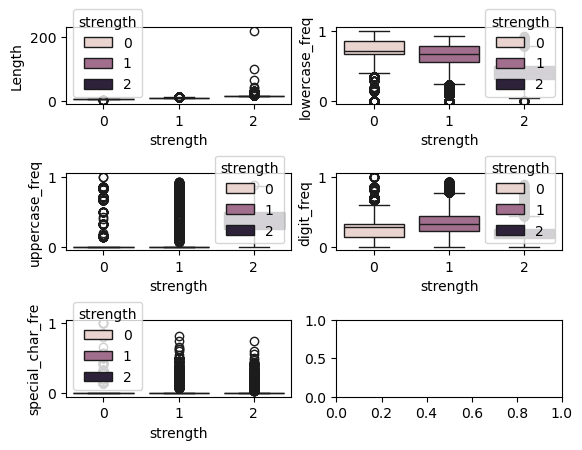

In [1262]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5 , ax6)) = plt.subplots(3,2)
sns.boxplot(x= "strength" , y= "Length" , hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_fre' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.9) #hspace= horizontal space to increase between plots for clear understanding

In [1263]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [1264]:
#Feature importance-- 
#Using distribution plot and violin plot to analyse

In [1265]:
def get_dist(data , feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x="strength" , y=feature , data= data)

    plt.subplot(1,2,2)
    sns.distplot(data[data["strength"]==0][feature] , color= "red" , label= "0" , hist= False)
    sns.distplot(data[data["strength"]==1][feature] , color= "blue" , label= "0" , hist= False)
    sns.distplot(data[data["strength"]==2][feature] , color= "yellow" , label= "0" , hist= False)
    plt.legend()
    plt.show()

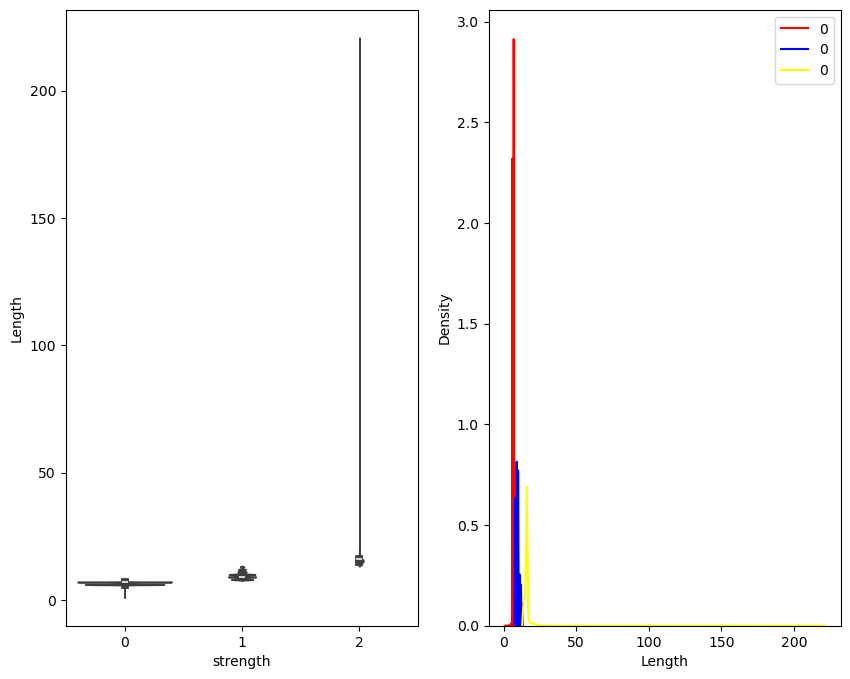

In [1266]:
get_dist(data, "Length")

In [1267]:
#AS WE can see from first plot, strength depends on length and in second plot also there is very less overlapping so strength is dependent on length

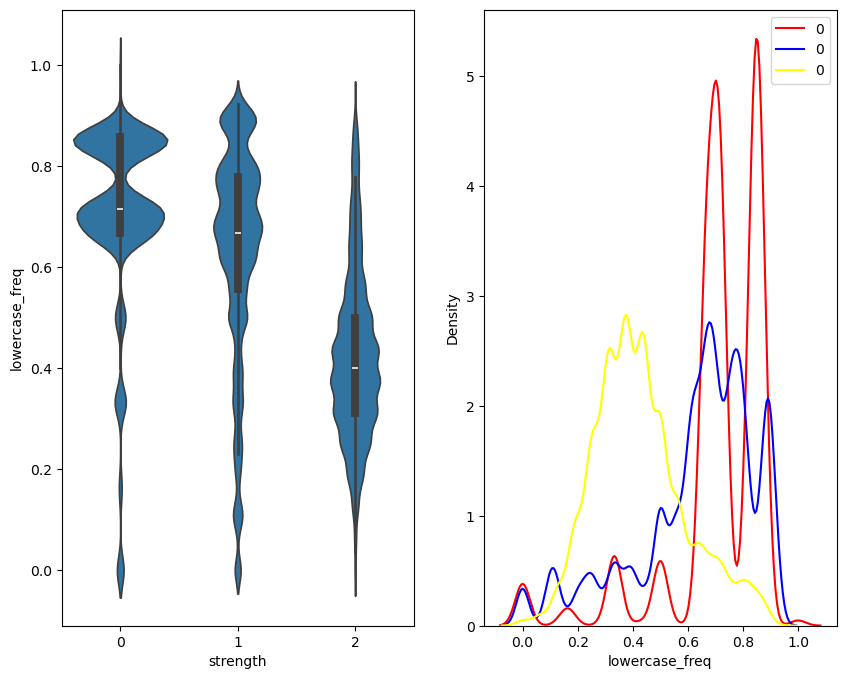

In [1268]:
get_dist(data, "lowercase_freq")

In [1269]:
#by observation , less overlapping so it is important

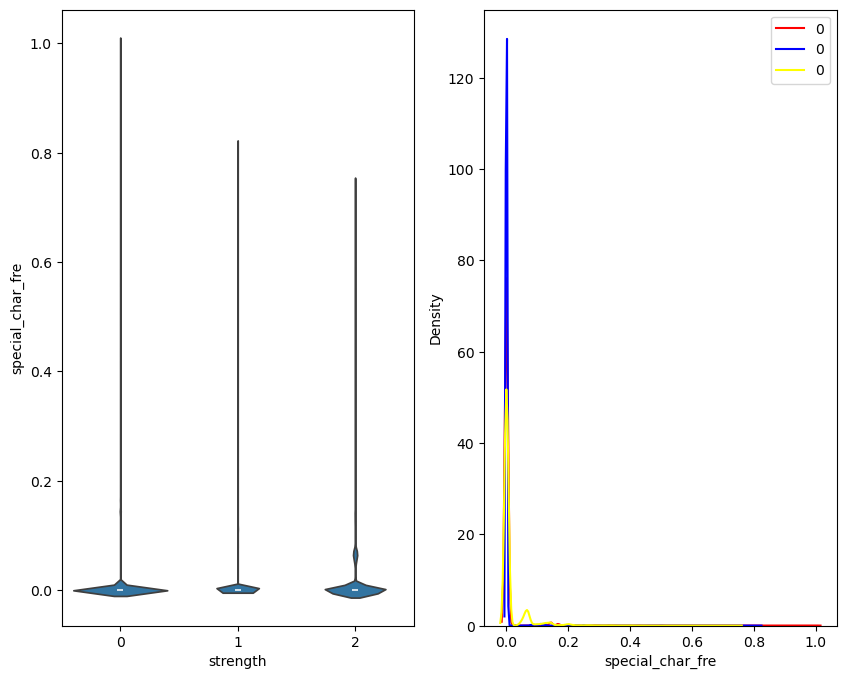

In [1270]:
get_dist(data, "special_char_fre")

In [1271]:
#we have lot of overlapping so it is not useful

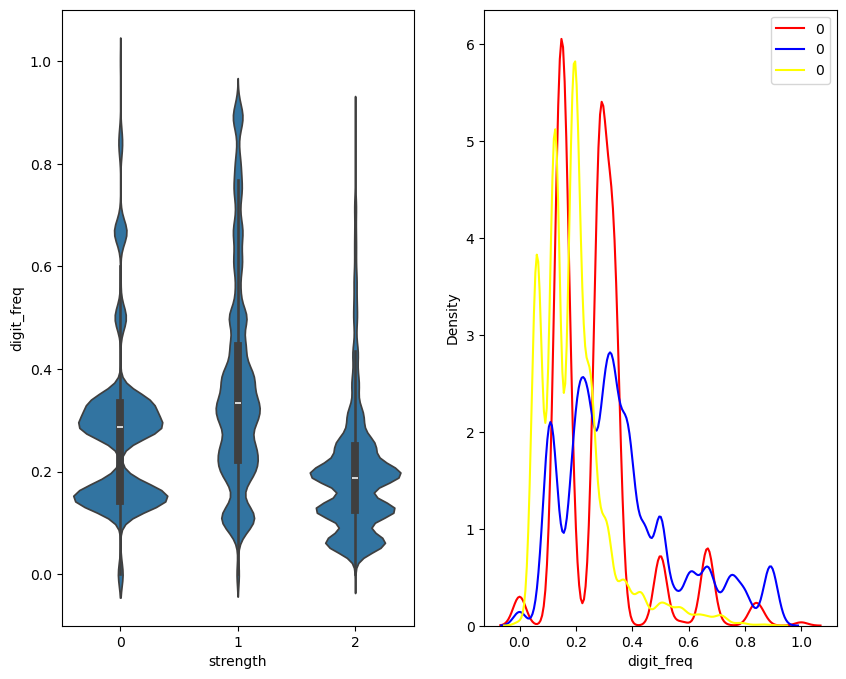

In [1272]:
get_dist(data, "digit_freq")

In [1273]:
#lots of overlapping so not important

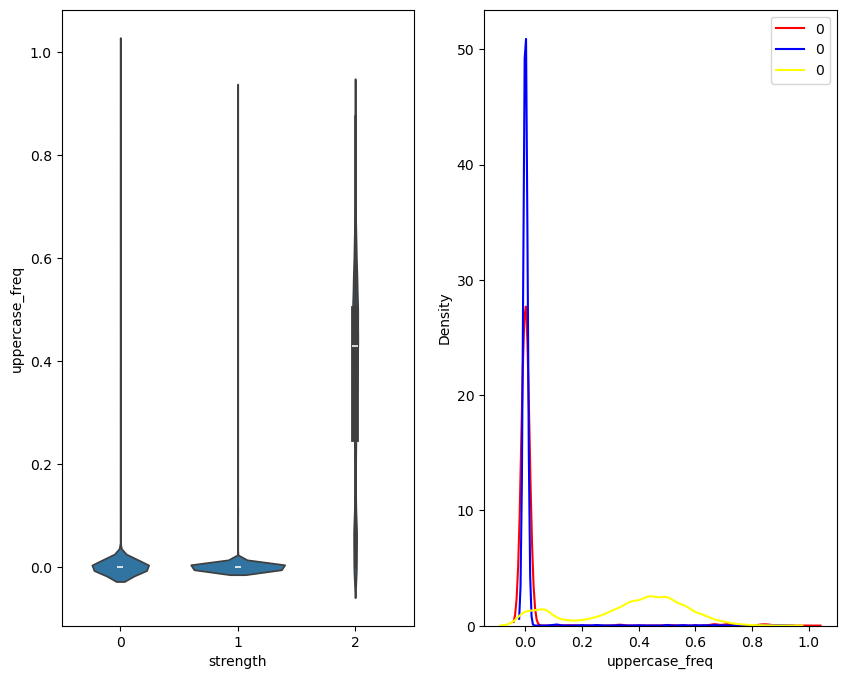

In [1274]:
get_dist(data, "uppercase_freq")

In [1275]:
#lots of overlapping so it is not useful

In [1276]:
#Password strength is dependent most on length and lowercase_frequenccy

In [1277]:
#We will use TF-IDF in this machine learning algorithm for this use

In [1278]:
#Since Ml cant understand text so the input password should be converted to vector representation 

In [1279]:
data.head(2)

,password,strength,Length,lowercase_freq,uppercase_freq,digit_freq,special_char_fre
0,zxe870819,1,9,0.333,0.0,0.667,0.0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.0


In [1280]:
df= data.sample(frac=1)

In [1281]:
from sklearn.feature_extraction.text import TfidfVectorizer # import TF-IDF vectorizer to convert text data into numerical data

In [1282]:
y= list(df["password"])   #fit transform function access/operates oonly on list or array so we converting df to list and store in a variable

In [1283]:
y= vectorizer.fit_transform(y)


In [1284]:
y.shape

(100000, 99)

In [1285]:
type(y)

scipy.sparse._csr.csr_matrix

In [1286]:
#y is a sparse matrix 

In [1287]:
y.toarray()[0]  #vector representation of our 0th password of sample data

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.5668567 , 0.        , 0.35049932,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.23592317, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.37449997, 0.38077855,
       0.2863912 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3645566 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [1288]:
len(vectorizer.get_feature_names_out())

99

In [1289]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [1290]:
df2=pd.DataFrame(y.toarray() , columns=vectorizer.get_feature_names_out())

In [1291]:
df.columns

Index(['password', 'strength', 'Length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_fre'],
      dtype='object')

In [1292]:
df2["Length"] = df['Length']
df2["lowercase_freq"] = df['lowercase_freq']
#as by our earlier analysis strength was mostly depenedent on these 2 parameters

In [1293]:
df2.head(2)

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,Length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417


In [1294]:
y = df["strength"]

In [1295]:
#Applying machine learning algorithms--

In [1296]:

from sklearn.model_selection import train_test_split

In [1297]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20, random_state= 56)

In [1298]:
X_train.shape

(80000, 101)

In [1299]:
y_train.shape

(80000,)

In [1300]:
from sklearn.linear_model import LogisticRegression 

In [1301]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")

In [1302]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [1303]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [1304]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [1305]:
from collections import Counter

In [1306]:
Counter(y_pred)

Counter({1: 16864, 2: 1732, 0: 1404})

In [1307]:
# 1462 with weak pwd, 1763 with strong and 16775 with medium


In [1308]:
#We have done model building

In [1309]:
#Dimenstions needed for clf= (1, 101)--- out of 101, 99 are from TF-IDF and 2 are the columns which we have added, lowercase and length
# as Logistic reg. model'clf' was trained on 101 features [99 from TF-IDF + 2 features from (total_length+lower_case_freq)]
# hence we need to convert any input(password) into (1,101) so that my model will accept this as Input ..

In [1310]:
password = "Aryan@0312"

In [1311]:
sample_array = np.array([password])

In [1312]:
sample_matrix = vectorizer.transform(sample_array) #vector representation of above array

In [1313]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25385645, 0.19475402, 0.22532097, 0.25236046, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.66175488, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37511023, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24110902, 0.        , 0.        , 0.        , 0.24983594,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28981661, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [1314]:
sample_matrix.toarray().shape


(1, 99)

In [1315]:
# Array dimension is (1,99) so now we need to make it (1,101) so that my model will accept it as input
# We need to add length_of_password and total_lowercase_chars in password as they were important

In [1316]:
l1= len(password)

In [1317]:

len([char for char in password if char.islower()])

4

In [1318]:
lower_cas_fre= len([char for char in password if char.islower()])/len(password)

In [1319]:
np.append(sample_matrix.toarray() , (l1, lower_cas_fre))

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.25385645,  0.19475402,  0.22532097,  0.25236046,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.66175488,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.37511023,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.24110902,  0.        ,  0.        ,  0.        ,  0.24983594,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.28981661,  0.        ,  0.        ,  0.  

In [1320]:
np.append(sample_matrix.toarray() , (l1, lower_cas_fre)).shape

(101,)

In [1321]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101) 
#our required dimensions were (1, 101) so we had to reshape it


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25385645, 0.19475402, 0.22532097, 0.25236046, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.66175488, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37511023, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24110902, 0.        , 0.        , 0.        , 0.24983594,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28981661, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [1322]:
new_matrix= np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101) 

In [1323]:
clf.predict(new_matrix)

array([2], dtype=int64)

In [1324]:
#2 means it is a strong password

In [1325]:
#lets automate this by a function--

In [1326]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [1327]:
predict()

Enter a password :  SkitJaipur


'Password is normal'

In [1328]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [1329]:
accuracy_score(y_test , y_pred)

0.80385

In [1330]:
confusion_matrix(y_test , y_pred)

array([[  741,  2008,     0],
       [  591, 13927,   323],
       [   72,   929,  1409]], dtype=int64)

In [1471]:
#Diagonal matrix element has the elements on which our model is accurate
"""
for 741= password is 0 and it matches the same
for 13927= password is 1 and it matches the same
for 1409= passowrd is 2 and it matches the same
total 16k accurate while total data was 20k so our accuracy is 80%
"""

'\nfor 741= password is 0 and it matches the same\nfor 13927= password is 1 and it matches the same\nfor 1409= passowrd is 2 and it matches the same\ntotal 16k accurate while total data was 20k so our accuracy is 80%\n'

In [1332]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.27      0.36      2749
           1       0.83      0.94      0.88     14841
           2       0.81      0.58      0.68      2410

    accuracy                           0.80     20000
   macro avg       0.72      0.60      0.64     20000
weighted avg       0.78      0.80      0.78     20000

